In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Iqram Haris Fahromi / NIM 12320021

In [2]:
# tensor grid
width = 100
height = 80

# titik tengah lingkaran target
x0z0 = [[-10,-50],[0,-50],[10,-50],[-10,-40],[0,-40],[10,-40],[-20,-30],[-20,-20],[20,-30],[20,-20],
       [10,-30],[10,-20],[0,-30],[0,-20],[-10,-30],[-10,-20]]

# G: konstanta universal gravitasi newton, x: variabel bebas
G = 6.67e-11 # SI (m^3 kg^-1 s^-2)
x = np.arange(-width,width+1,5)

# [contoh] parameter model sintetik
x0 = 0 # m
z0 = -3 # m
R = 5 # m
rho = -2670 # kg/m3

# persamaan forward modelling bola homogen
def f(x0, z0, R, rho):
    return G*((4/3)*np.pi*(R**3)*z0*(0-rho))/(((x-x0)**2+(z0**2))**(3/2))

# persamaan plot bola homogen
def bola_homogen(x0, z0, R):
    q = np.linspace(0,2*np.pi,1000)

    xSphere = R*np.cos(q)+x0
    zSphere = R*np.sin(q)+z0
    
    return xSphere, zSphere

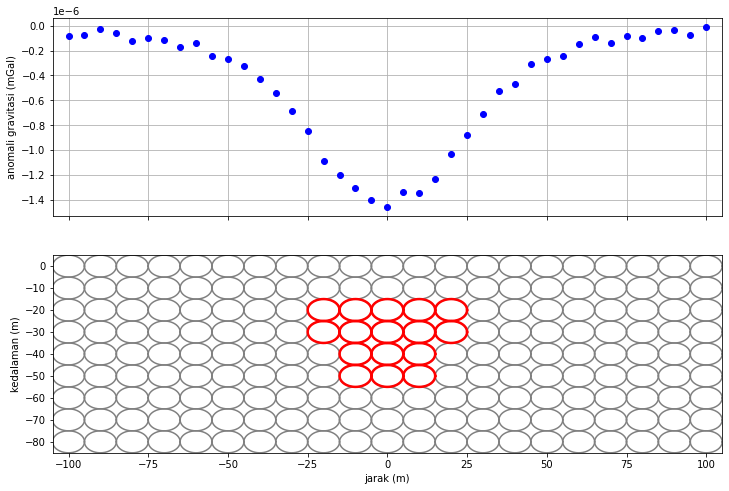

In [3]:
# plotting
fig, (ax1, ax2) = plt.subplots(2, 1,sharex=True, figsize=(12,8)) # menyiapkan dua plot axis

for w in range(-width, width+10, 10):
    for h in range(-height, 10, 10):
        xSphere,zSphere = bola_homogen(w,h,R) # plot grid lingkaran [tensor]
        ax2.plot(xSphere, zSphere, "grey")

for circle in x0z0:
    xSphere,zSphere = bola_homogen(circle[0],circle[1],R)
    ax2.plot(xSphere, zSphere, "red", linewidth=2.5)

gz_values = np.zeros(len(x)) # variabel penyimpan gz total setiap setiap lingkaran

for circle in x0z0:
    gz_values+=f(circle[0], circle[1], R, rho) # menghitung nilai gz dgn persamaan forward

# menambahkan noise
rng = np.random.default_rng(seed=3)
noise = rng.uniform(-0.5*(10e-8), 0.5*(10e-8), len(gz_values))

# plot per axis
ax1.plot(x, gz_values+noise,'bo')
ax1.grid()
ax1.set_xlim(-width, width)
ax1.set_ylabel("anomali gravitasi (mGal)",color='k')

ax2.set_ylim(-height-5, 5)
ax2.set_xlim(-width-5, width+5)
ax2.set_ylabel("kedalaman (m)",color='k')
ax2.set_xlabel("jarak (m)",color='k')
plt.show()